# Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Loading the data

In [2]:
train = pd.read_csv("train_BRCpofr.csv")
test = pd.read_csv("test_koRSKBP.csv")

In [3]:
# display train data
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
# display test data
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
# Displaying the shape of the data
print("Shape of train data: {}".format(train.shape))
print("Shape of test data: {}".format(test.shape))

Shape of train data: (89392, 12)
Shape of test data: (59595, 11)


# Information about the data
```
Its time for deep dive into the data!
```

In [6]:
# Cheaking the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [7]:
# Convert marital status in categorical feature
train['marital_status'] = train['marital_status'].astype('object')

In [8]:
# summary statistics of the data
train.describe()

,id,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,4.595669,4351.502416,97952.828978
std,25805.391969,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,24828.000000
25%,22348.750000,3.000000,2406.000000,52836.000000
50%,44696.500000,5.000000,4089.000000,66396.000000
75%,67044.250000,6.000000,6094.000000,103440.000000
max,89392.000000,8.000000,31894.000000,724068.000000


###### Insights:
```
1.Customers claimed ₹4351 of insurance on an average. Maximum and minimum claim amount are 31894 and 0 respectively.
2.For vintage motor vehicle, first policy takes on an average 5 years.
```

In [9]:
#cheaking for missing value
print('Percentage of missing data in train data:\n {}'.format(round((train.isnull().sum()/train.shape[0])*100,2)))
print('Percentage of missing data in test data:\n{}'.format(round((test.isnull().sum()/test.shape[0])*100,2)))

Percentage of missing data in train data:
 id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
cltv              0.0
dtype: float64
Percentage of missing data in test data:
id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
dtype: float64


###### Insights:
```
There is no missing value present in the data
```

In [10]:
# cheaking for duplicated values
print('The no of duplicated value in train data is {}'.format(train.duplicated().sum()))
print('The no of duplicated value in test data is {}'.format(test.duplicated().sum()))

The no of duplicated value in train data is 0
The no of duplicated value in test data is 0


# Exploratory Data Analysis

### 1. Univariate Data Analysis

###### (i) For Categorical Features

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  object
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 8.2+ MB


In [12]:
cat_features = [feature for feature in train.columns if train[feature].dtypes == 'O']
cat_features

['gender',
 'area',
 'qualification',
 'income',
 'marital_status',
 'num_policies',
 'policy',
 'type_of_policy']

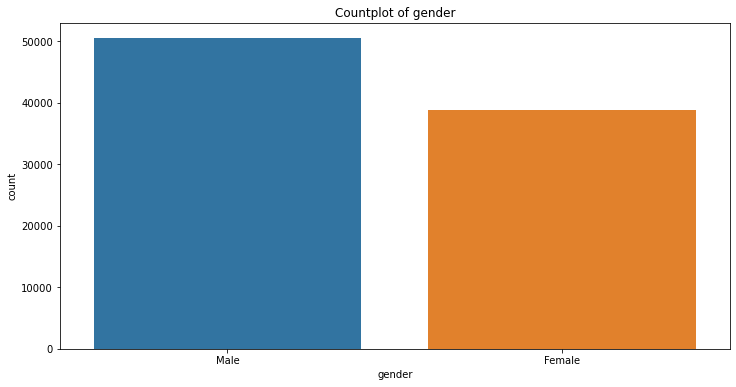

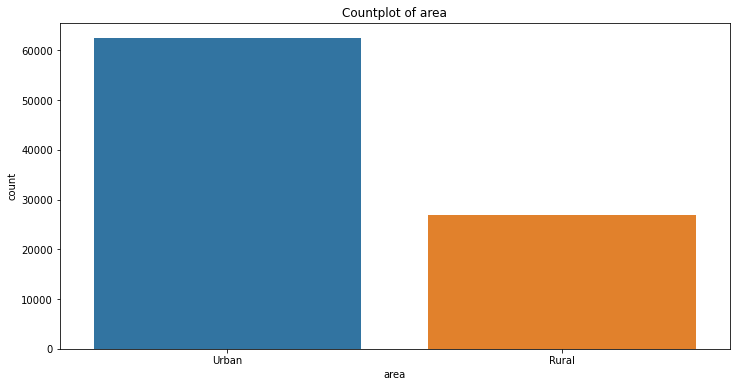

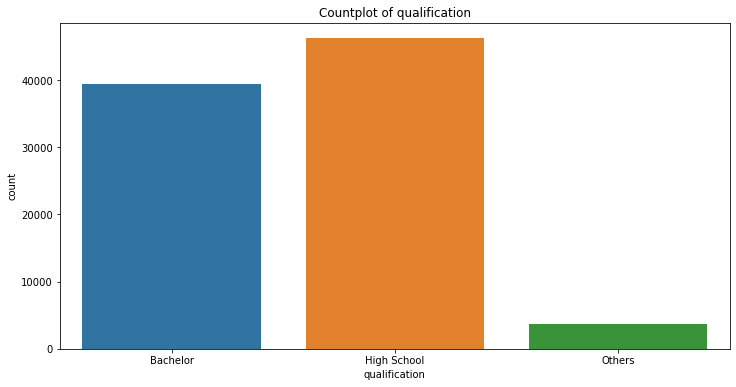

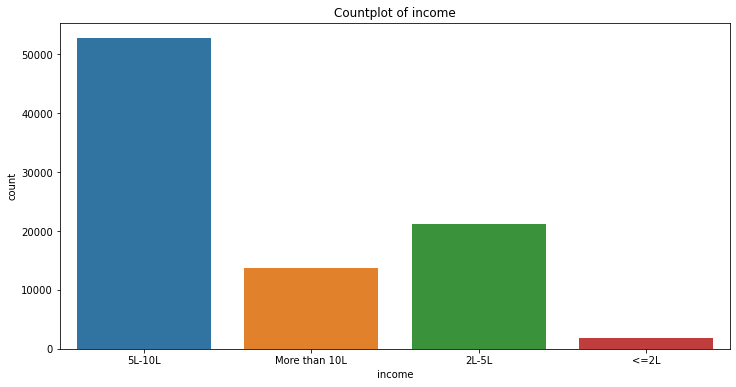

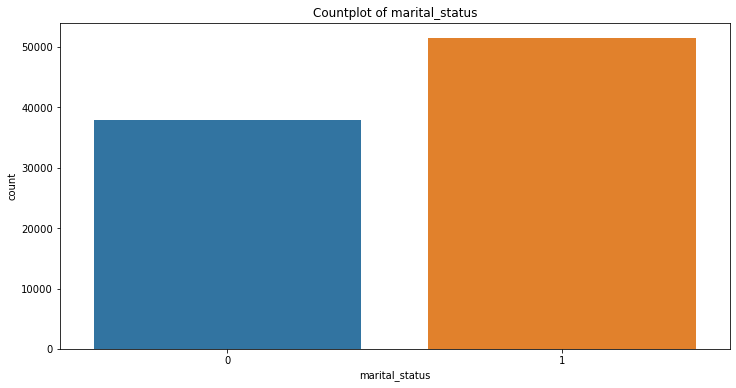

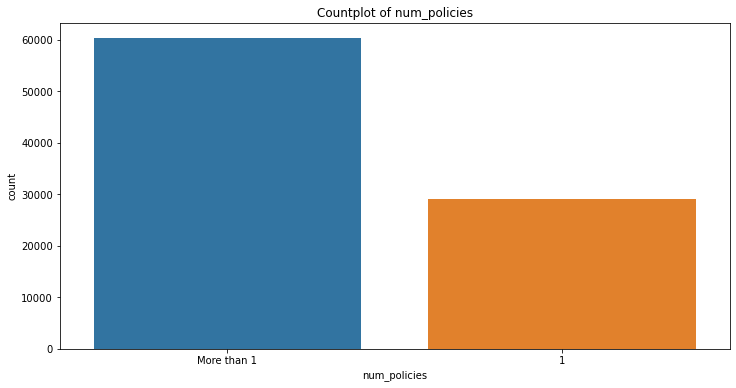

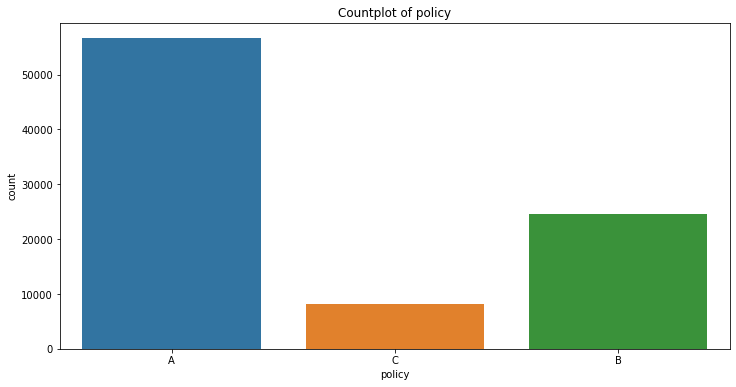

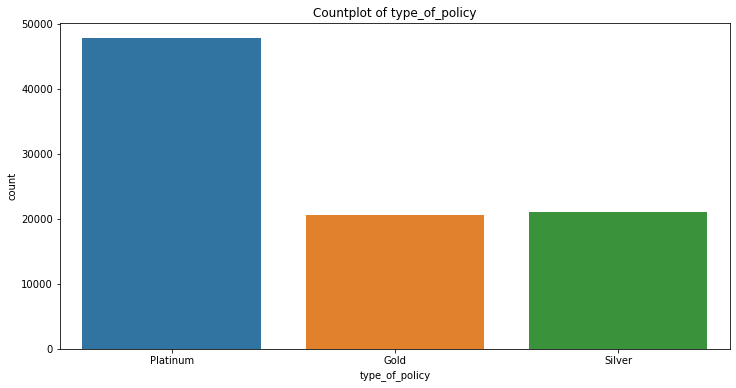

In [13]:
#countplot for categorical columns
for feature in cat_features:
    plt.figure(figsize=(12,6))
    plt.title('Countplot of {}'.format(feature))
    sns.countplot(train[feature])

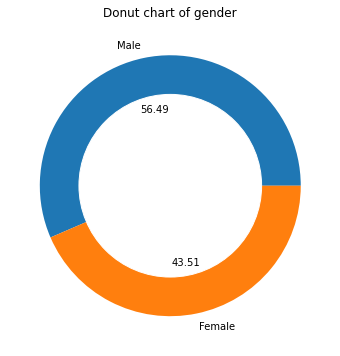

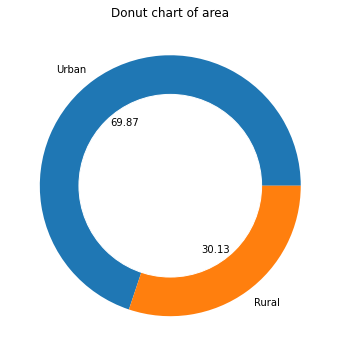

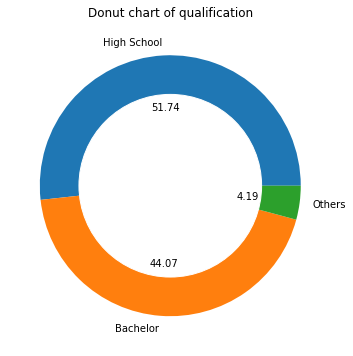

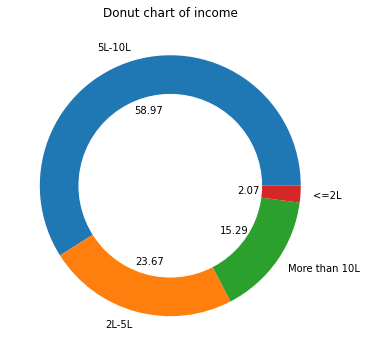

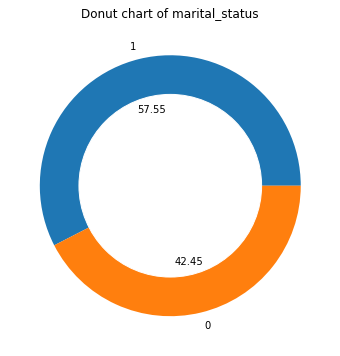

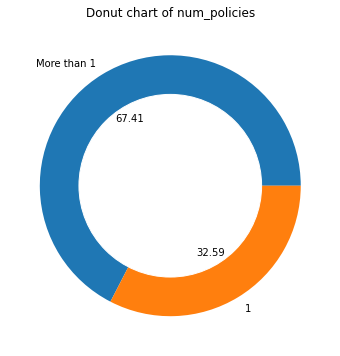

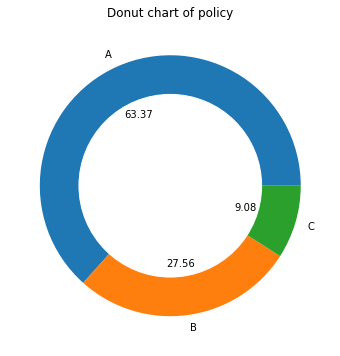

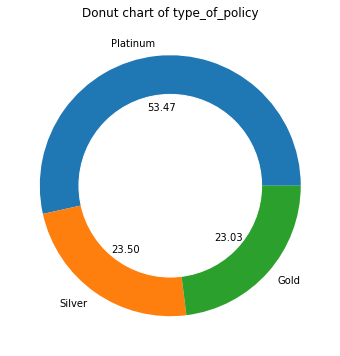

In [14]:
# Creating Donut chart
for feature in cat_features:
    plt.figure(figsize = (6,6))
    values = train[feature].value_counts().values
    plt.title('Donut chart of {}'.format(feature))
    plt.pie(values,labels = train[feature].value_counts().index,autopct='%.2f')
    circle = plt.Circle( (0,0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(circle)
    plt.show()

###### Insights:
```
1. Male customers are greater than female customers
2. Around 70% of customer's families are urban
3. Most of the customer's highest qualification is high school degree
4. Around 60% customers income 5-10 lpa
5. Most of customers are married
6. Most of the customers issued more than 1 policies
7. Most of the customers actively using policy 'A' with policy type 'Platinum'
```

###### (ii) For Numerical features

In [15]:
num_features = [feature for feature in train.drop('id',axis = 1).columns if train[feature].dtypes == 'int64']

In [16]:
num_features

['vintage', 'claim_amount', 'cltv']

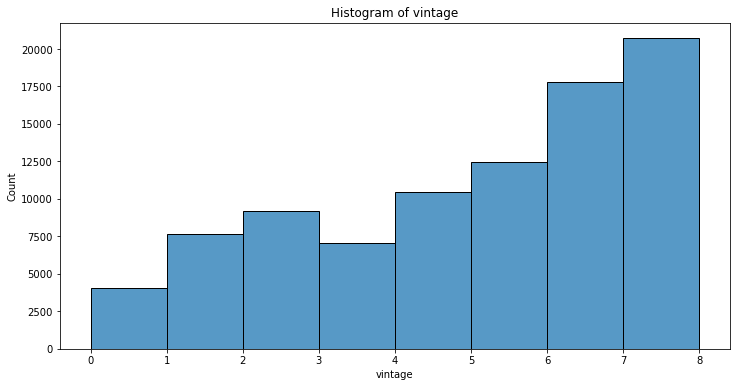

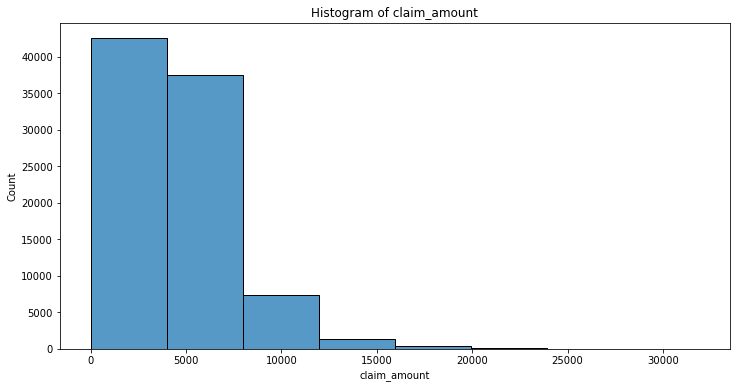

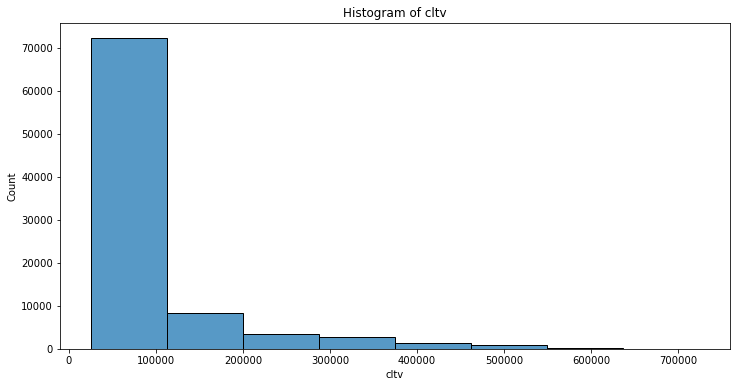

In [17]:
for feature in num_features:
    plt.figure(figsize=(12,6))
    plt.title('Histogram of {}'.format(feature))
    sns.histplot(train[feature],bins=8)

<Figure size 864x432 with 0 Axes>

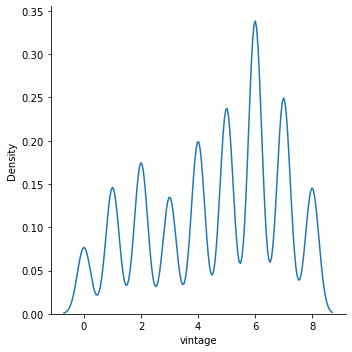

<Figure size 864x432 with 0 Axes>

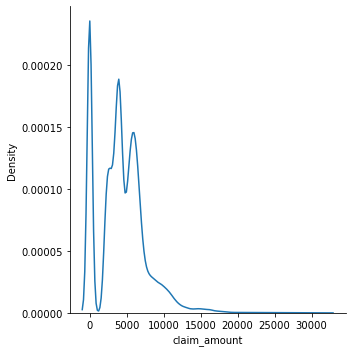

<Figure size 864x432 with 0 Axes>

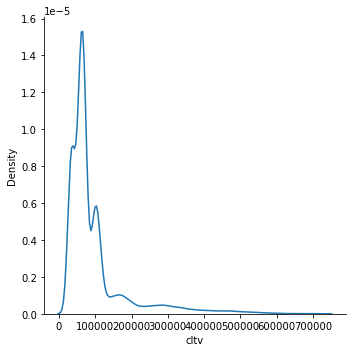

In [18]:
#distplot of these num feature
for feature in num_features:
    plt.figure(figsize=(12,6))
    sns.displot(train[feature],kind='kde')

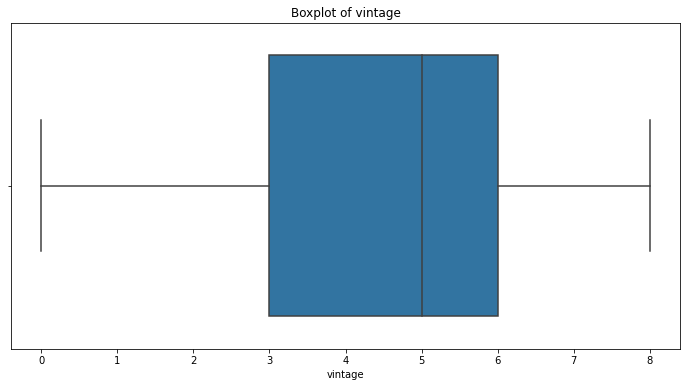

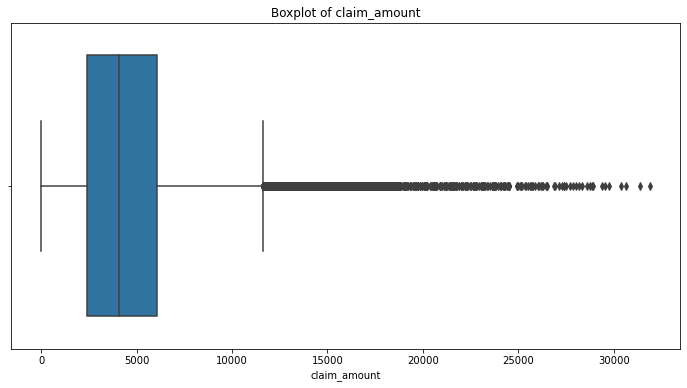

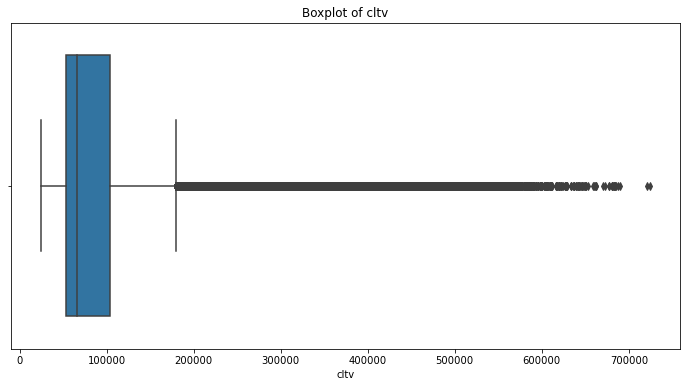

In [19]:
for feature in num_features:
    plt.figure(figsize=(12,6))
    plt.title('Boxplot of {}'.format(feature))
    sns.boxplot(train[feature])

###### Insights:
```
1. Most of the customers cltv is less than 1 lakh and cltv is a +ve skewed data
2. Most of the customers takes around 8 years since the first policy
3. We can see that some number of data are out of range in the boxplot of cltv and claim_amount
```

# Bivariate Data Analysis

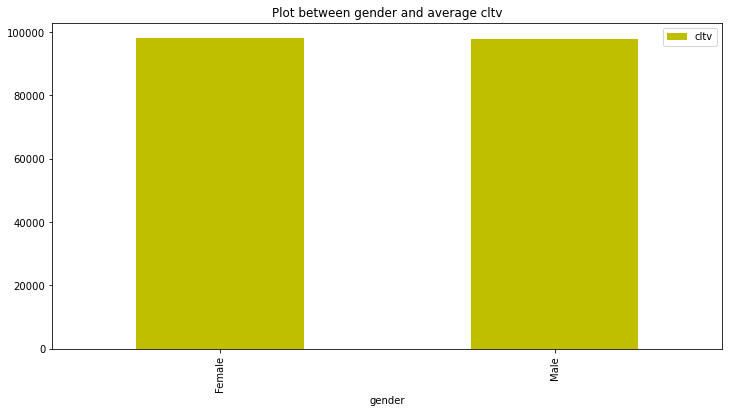

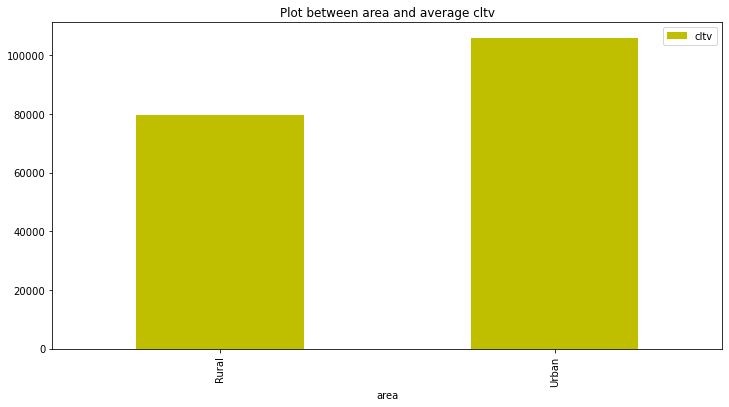

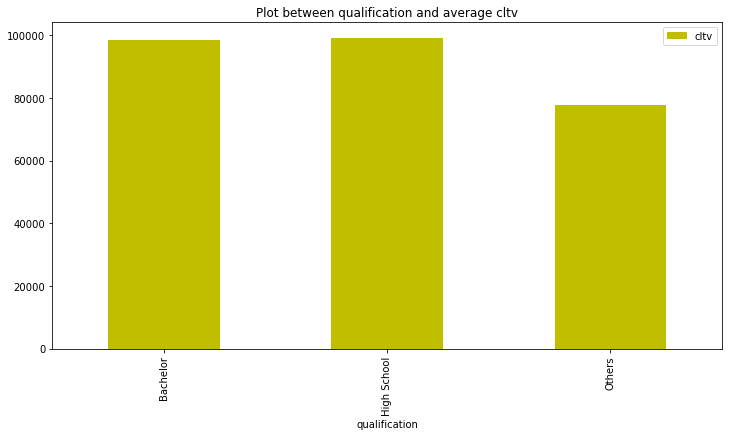

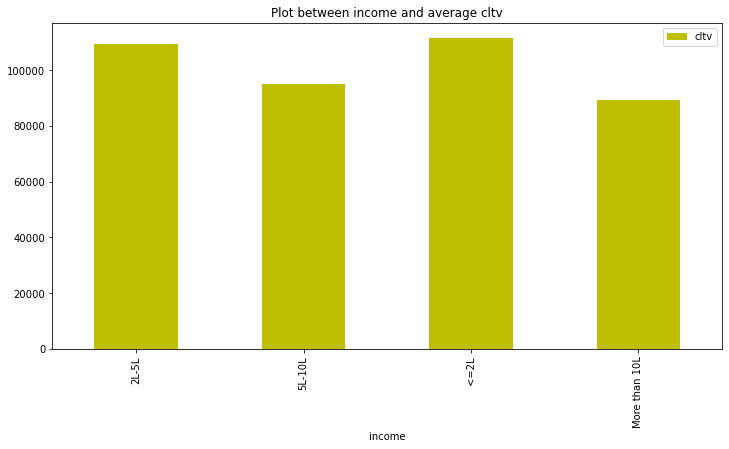

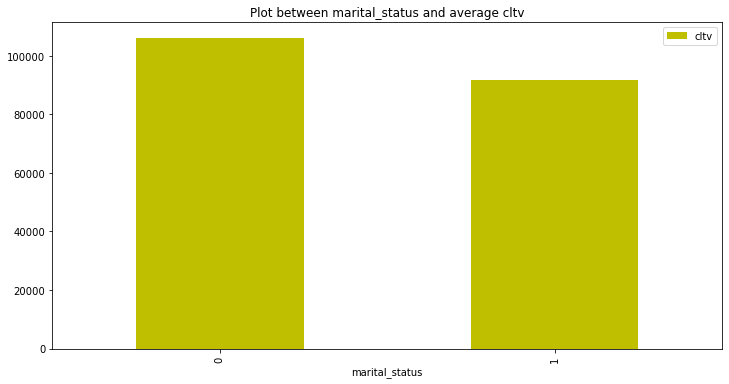

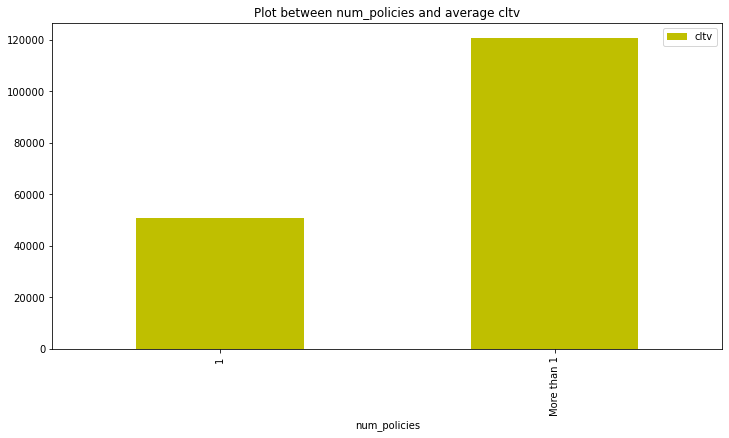

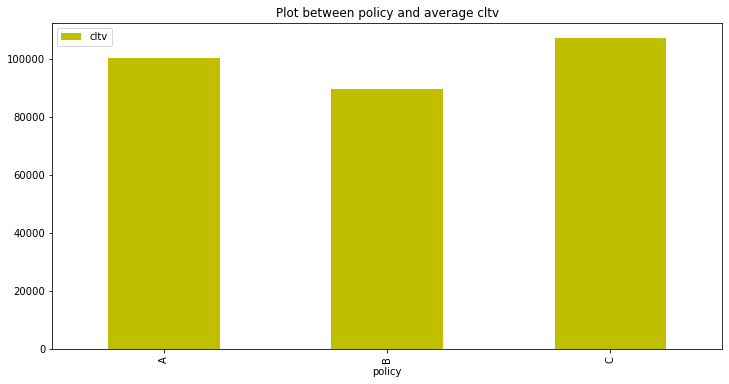

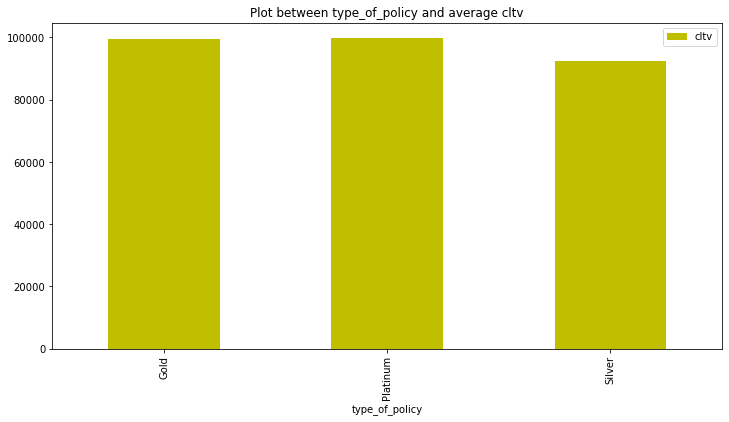

In [20]:
# Bar plot for finding relation between the features
for cat in cat_features:
    plt.figure(figsize = (12,6))
    plt.title('Plot between {} and average cltv'.format(cat))
    train.groupby(cat)['cltv'].mean().plot(kind = 'bar',legend = True,color = 'y')

###### Insights
```
1. Male and female customer have almost equal average Customer life time value.
2. Urban customers average cltv is higher than rural
3. The customers who have higher degree, they have higher average cltv
4. Customers having income level <=2L is the highest average cltv then followed by 2-5L customer
   i.e Those customer who have higher income their average cltv lower
5. Non-maried people have higher income
6. Customers who issues more than 1 policy they will have higher average cltv
7. If customers issues 'C' policy, they usualy have higher average cltv with the type of policy 'platinum' or 'Gold'
```

In [21]:
# plot Claim amount vs average cltv
df = pd.pivot_table(train,values='cltv',index='claim_amount',aggfunc=np.mean)

Text(0.5, 1.0, 'Claim amount vs average cltv')

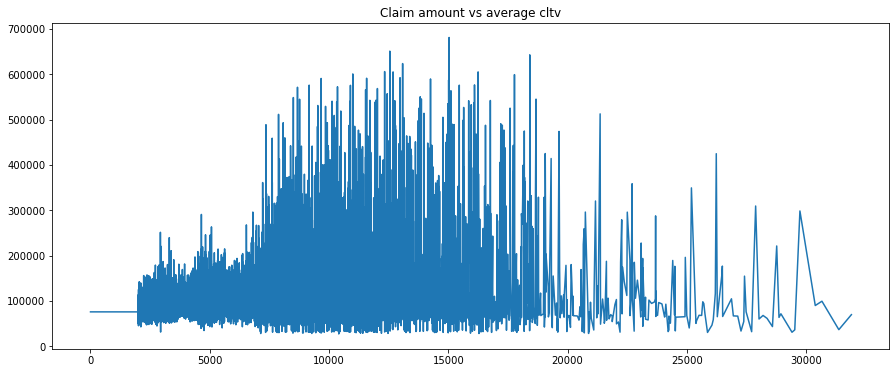

In [22]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df.values.flatten())
plt.title('Claim amount vs average cltv')

In [23]:
# plot vintage vs average cltv
df1 = pd.pivot_table(train,values='cltv',index='vintage',aggfunc=np.mean)

Text(0.5, 1.0, 'vintage vs average cltv')

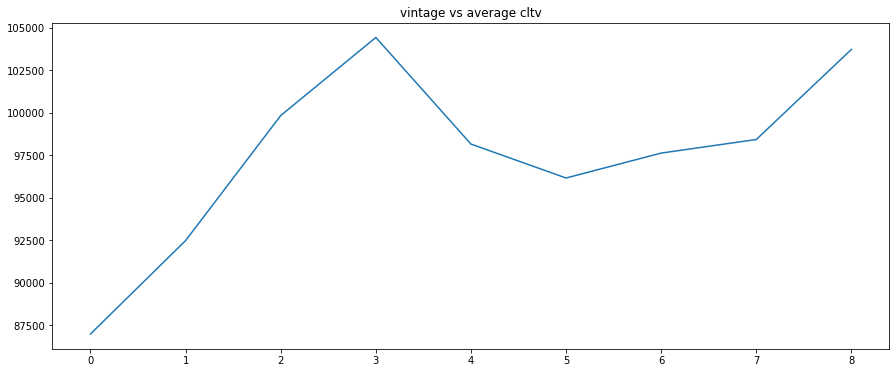

In [24]:
plt.figure(figsize = (15,6))
plt.plot(df1.index,df1.values.flatten())
plt.title('vintage vs average cltv')

###### Insights
```
1. If claim amount is ranging between 7.3k to 18k,then average customer life time value increase
2. If customer takes 0-3 years for first policy then their average customer life time value increase.
```

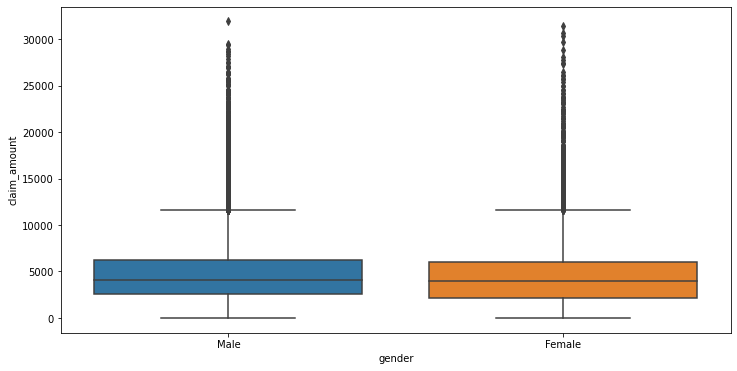

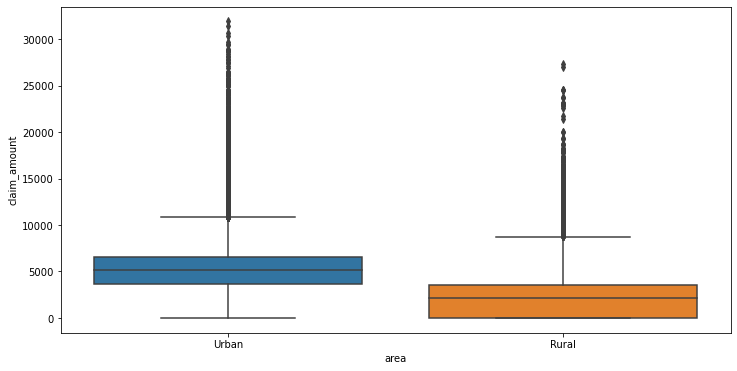

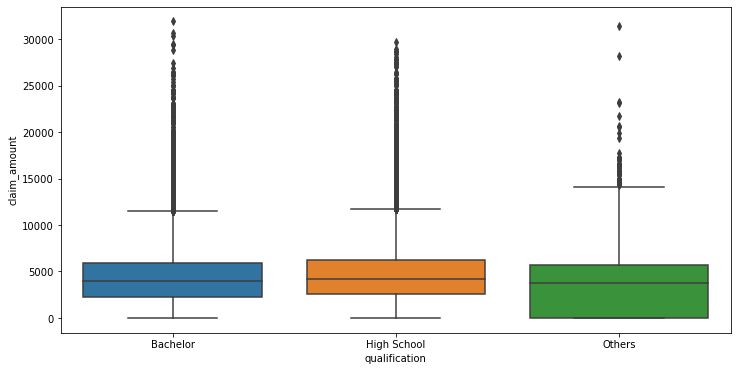

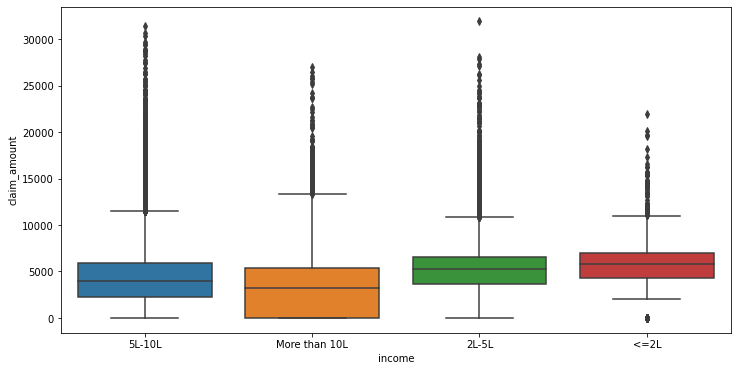

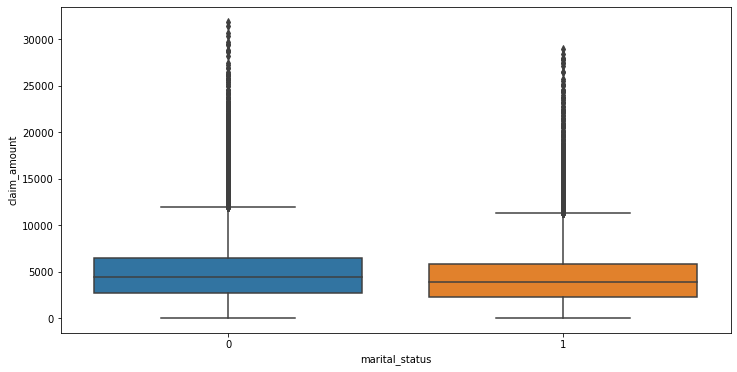

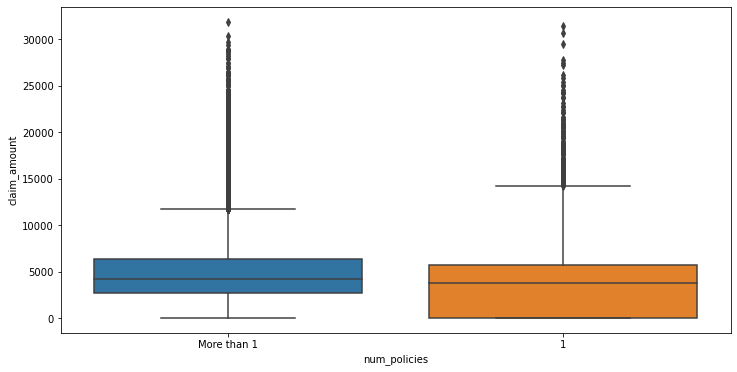

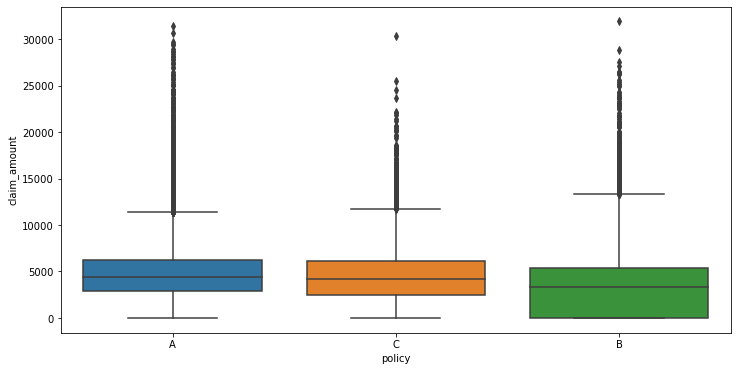

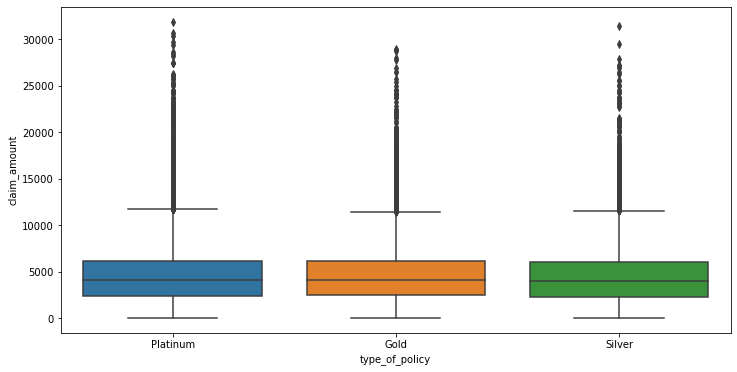

In [25]:
for feature in cat_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x = feature,y = 'claim_amount',data=train)

In [26]:
# with respect to all the categorical column, claim amount has extreme values 

<AxesSubplot:>

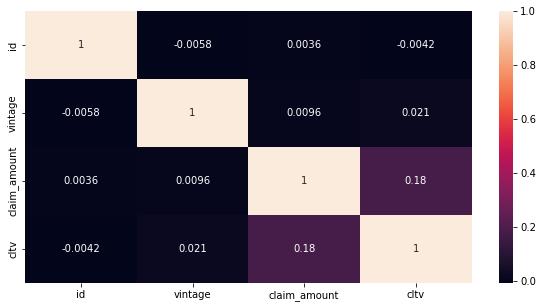

In [27]:
# correlation plot
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(),annot=True)

In [28]:
# Not that much correlation not seen here

# Feature Engineering

In [29]:
#converting categorical data to dummy variable

In [30]:
df = pd.get_dummies(data = train, columns = ['gender', 'area', 'qualification', 
                                         'income','num_policies','policy','type_of_policy'], drop_first=True)
df

,id,marital_status,vintage,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,1,1,0,0,1,0,0,1,0,0,1,0
1,2,0,8,5080,515400,1,0,1,0,1,0,0,1,0,0,1,0
2,3,1,8,2599,64212,1,1,0,0,1,0,0,1,0,0,1,0
3,4,0,7,0,97920,0,0,1,0,1,0,0,1,0,0,1,0
4,5,1,6,3508,59736,1,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,6,0,95736,1,0,1,0,0,0,1,1,1,0,1,0
89388,89389,1,0,3897,67596,1,1,0,0,1,0,0,1,0,0,1,0
89389,89390,0,4,3363,114120,0,1,0,0,1,0,0,1,1,0,1,0
89390,89391,0,8,0,71772,0,0,1,0,0,0,0,1,1,0,1,0


In [31]:
#dropping id column
df.drop('id',axis = 1,inplace=True)

In [32]:
df.shape

(89392, 16)

In [33]:
#same doing for test data
df1 = pd.get_dummies(data = test, columns = ['gender', 'area', 'qualification', 
                                         'income','num_policies','policy','type_of_policy'], drop_first=True)
df1

,id,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,89393,0,6,2134,0,0,1,0,1,0,0,1,1,0,0,1
1,89394,0,4,4102,0,1,1,0,0,0,0,1,0,0,1,0
2,89395,1,7,2925,1,0,1,0,1,0,0,1,1,0,0,0
3,89396,1,2,0,0,0,0,0,0,0,1,1,1,0,0,1
4,89397,0,5,14059,0,1,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,1,6,0,1,0,0,0,1,0,0,0,0,0,0,1
59591,148984,0,6,0,1,1,1,0,1,0,0,0,0,1,0,0
59592,148985,1,4,3323,0,1,1,0,0,0,0,1,1,0,1,0
59593,148986,0,1,2886,1,0,0,0,1,0,0,1,0,0,0,1


In [34]:
#dropping id column
df1.drop('id',axis = 1,inplace=True)

In [35]:
df1.shape

(59595, 15)

In [36]:
df['claim_amount'] = (df['claim_amount'] - df['claim_amount'].mean())/(df['claim_amount'].std())
df1['claim_amount'] = (df1['claim_amount'] - df1['claim_amount'].mean())/(df1['claim_amount'].std())

In [37]:
# Splitting the data into dependent and independent feature
X = df.drop('cltv', axis = 1).iloc[:,:]
y = df['cltv']
X_test = df1

In [38]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=4)

In [39]:
X_train

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
26527,0,0,-0.144221,1,1,0,1,0,0,0,1,0,0,1,0
33431,1,8,-0.397719,1,1,0,0,1,0,0,1,0,0,0,1
66724,1,7,-1.333851,0,1,0,0,1,0,0,1,0,0,1,0
74568,0,5,-0.053183,1,1,0,0,1,0,0,1,0,1,0,0
12303,1,3,1.529107,1,1,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65276,0,2,1.740304,0,1,1,0,1,0,0,1,0,0,0,0
23346,1,7,0.018851,1,1,0,0,1,0,0,1,0,0,1,0
11863,1,6,-0.111730,1,1,1,0,1,0,0,0,0,0,1,0
73902,1,7,-0.623323,1,0,1,0,0,0,0,1,1,0,1,0


# Model Building

In [40]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error

In [41]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [42]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_val)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_val, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_val, y_pred))
    print("\tR2 score:", r2_score(y_val, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.376s
	Prediction time: 3.629s
	Explained variance: -0.011024172620258454
	Mean absolute error: 56337.328575423686
	R2 score: -0.01113493171006108

GradientBoostingRegressor()
	Training time: 4.624s
	Prediction time: 0.025s
	Explained variance: 0.16501511025531967
	Mean absolute error: 50576.6243650922
	R2 score: 0.16501504597335115

KNeighborsRegressor()
	Training time: 0.329s
	Prediction time: 3.325s
	Explained variance: -0.011024172620258454
	Mean absolute error: 56337.328575423686
	R2 score: -0.01113493171006108

ExtraTreesRegressor()
	Training time: 15.813s
	Prediction time: 0.895s
	Explained variance: -0.19991515800837312
	Mean absolute error: 59257.19311063353
	R2 score: -0.20032263363686598

RandomForestRegressor()
	Training time: 18.750s
	Prediction time: 0.547s
	Explained variance: 0.04014454301401449
	Mean absolute error: 55903.00536148731
	R2 score: 0.03738969838237127

DecisionTreeRegressor()
	Training time: 0.416s
	Prediction time: 0

In [43]:
# Fitting Gradinetboosting regressor algorithm
gbr = GradientBoostingRegressor()

In [44]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_val)
r2_score(y_val,y_pred)

0.16501504597335115

# Submission file creation

In [45]:
y_pred = y_pred = gbr.predict(X_test)

In [46]:
sample_submission = pd.DataFrame({'id':test.iloc[:,0],'cltv':y_pred})

In [47]:
sample_submission.to_csv("sample_submission.csv",index=False)